# Furkan Karabulut (fkarabu)
# April 23, 2024
# CSC 295-002
# Keras and Tensorflow
## yfinance, matplotlib, numpy

**This project will be about guessing stock prices using Keras and Tensorflow deeplearning libraries. We will be getting historical stock data from yfinance and we will be using matplotlib to visualize the stock data and predicted data for a specific company. We will be using numpy to manipulate the data and to create the model. We will be using Keras and Tensorflow to create the model and to train the model.**


- https://www.youtube.com/watch?v=auR3R__PH0Q

In this video, we understand which features are important for the stock price prediction. In this video, the professor, Ticker Balch from Georgia Tech, explains the importance of the features in the stock price prediction such as the volume, the open price, the close price, the high price, the low price and adjusted closed price. In this video, they are using different libraries to download data and predict the stock prices.

- https://www.youtube.com/watch?v=1O_BenficgE&t=4s


In this video, we understand how to download the data from the Yahoo Finance using the yfinance library. Also, we understand from this video that how to use ticker and get information about specific companies with current date and time. 


- https://pypi.org/project/yfinance/


yfinance is a popular library for downloading the stock data from Yahoo Finance. It is a very useful library for downloading the stock data and analyzing the stock data. This link will take you to the official website of the yfinance library and explain how to donwload the library and use it in your code.

- https://www.youtube.com/watch?v=PuZY9q-aKLw&t=4s


This video, explains how to build a model with Keras using LSTM, which is a type of Recurrent Neural Network (RNN), how to train and run the model using our data. 

In [7]:
import yfinance as yf

In [9]:
# Get information about Microsoft and learn how yfinance works
msft = yf.Ticker("MSFT")

msft.info

print(msft.info)

/opt/anaconda3/lib/python3.11/site-packages/yfinance/base.py:310: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  holders = _pd.read_html(resp)


{'regularMarketPrice': None, 'logo_url': ''}


In [4]:
ticker = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
data = yf.download(ticker, start="2024-01-01")
data['Close']


Exception in thread Exception in thread Thread-11 (_run_via_pool):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
Thread-15 (_run_via_pool):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-12 (_run_via_pool):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.11/threading.py", line 982, in run
    self.run()
  File "/opt/anaconda3/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.11/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    self.run()
  File "/opt/anaconda3/lib/python3.11/threading.py", line 982, in run
    return callee(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/li

KeyboardInterrupt: 

In [ ]:
# get mean of volume for each company 
# it shows average daily volume of each company
data['Volume'].mean()

Ticker
AAPL     6.120973e+07
AMZN     4.297798e+07
GOOGL    3.012232e+07
MSFT     2.197331e+07
NFLX     4.456884e+06
NVDA     5.224532e+07
TSLA     1.015944e+08
dtype: float64

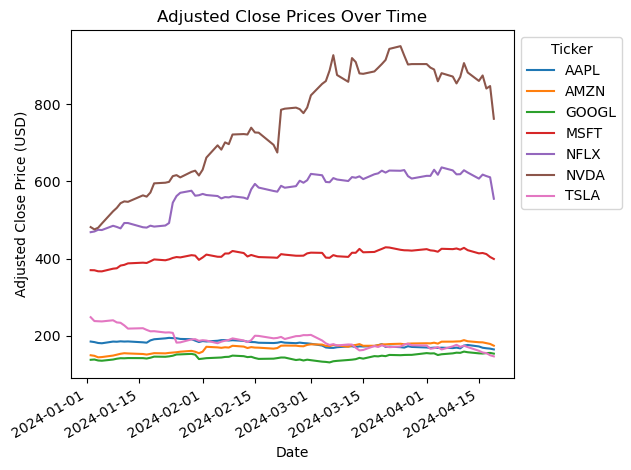

In [ ]:
import matplotlib.pyplot as plt
data['Adj Close'].plot(title='Adjusted Close Prices Since 2024')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices Since 2024')
plt.legend(title='Ticker', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()


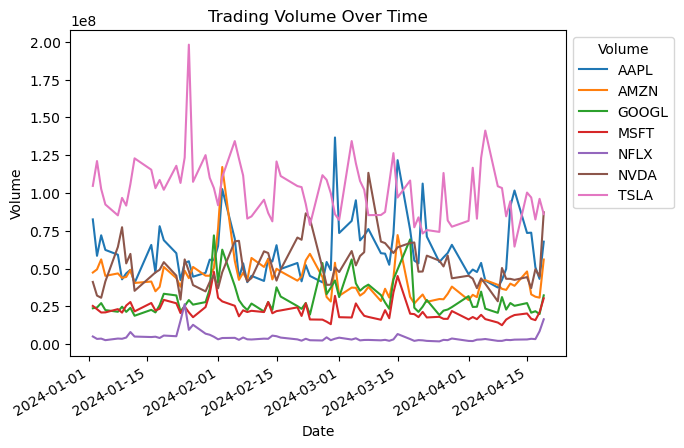

In [17]:
data['Volume'].plot(title='Volume Since 2024')

plt.xlabel('Date')
plt.ylabel('Volume')

plt.title('Trading Volume Since 2024')
plt.legend(title='Volume', loc='upper left', bbox_to_anchor=(1, 1))

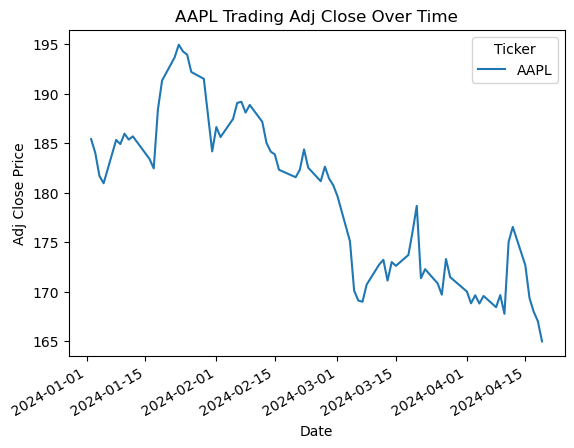

In [19]:
# Get for specific company instead of all together
aapl_volume = data['Adj Close']['AAPL']
aapl_volume.plot(title='AAPL Trading Adj Close Since 2024')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')


plt.legend(['AAPL'], title='Ticker')
plt.show()

In [ ]:
import datetime as dt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [ ]:
# Now Machine Language 
# Company I am interested in Apple
start = dt.datetime(2024, 1, 1)
end = dt.datetime(2024, 4, 21)

apple = 'AAPL'

apple_data = yf.download(apple, start = start, end = end)

In [ ]:
# Prepare Data

# Scale the price between 0 to 1 instead of USD Dollar
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Since 2024 so totally we have 120 days
# first get 60 days we know, then test it with the next 60 days we know
# then come up with a good gues :)
prediction_days = 60

x_train = []
y_train = []

for x in range (prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))





In [ ]:
# Build the model
model = Sequential()

model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# Prediction of the next closing price
model.add(Dense(units=1)) 

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

In [ ]:
# Test the model accuracy on existing data
test_start = dt.datetime(2024, 1, 1)
test_end = dt.datetime.now()

app_test = yf.download(apple, start = test_start, end = test_end)
read_price = app_test['Adj Close'].values

total_dataset = pd.concat((apple_data['Adj Close'], app_test['Adj Close']), axis=0)

# Get the last 60 days
model_inputs = total_dataset[len(total_dataset) - len(app_test) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
# Make Prediction now
x_test = []
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = predicted_prices[:, 0, 0]
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))


In [ ]:
# Plot the test prediction
plt.plot(read_price, color='black', label='Actual Apple Price')
plt.plot(predicted_prices, color='green', label='Predicted Apple Price')
plt.title('Apple Price Prediction')
plt.xlabel('Next Days')
plt.ylabel('Price')
plt.legend()